In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

def load_stroke_data():
    csv_path = os.path.join("datasets", "healthcare-dataset-stroke-data.csv")
    # more info about the data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/metadata
    return pd.read_csv(csv_path)

more info about the data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/metadata

In [3]:
stroke = load_stroke_data()

In [4]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# check whether stroke variabile is binary
stroke["stroke"].where(stroke["stroke"]!=0).where(stroke["stroke"]!=1).mean()

nan

In [7]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Saving figure attribute_histogram_plots


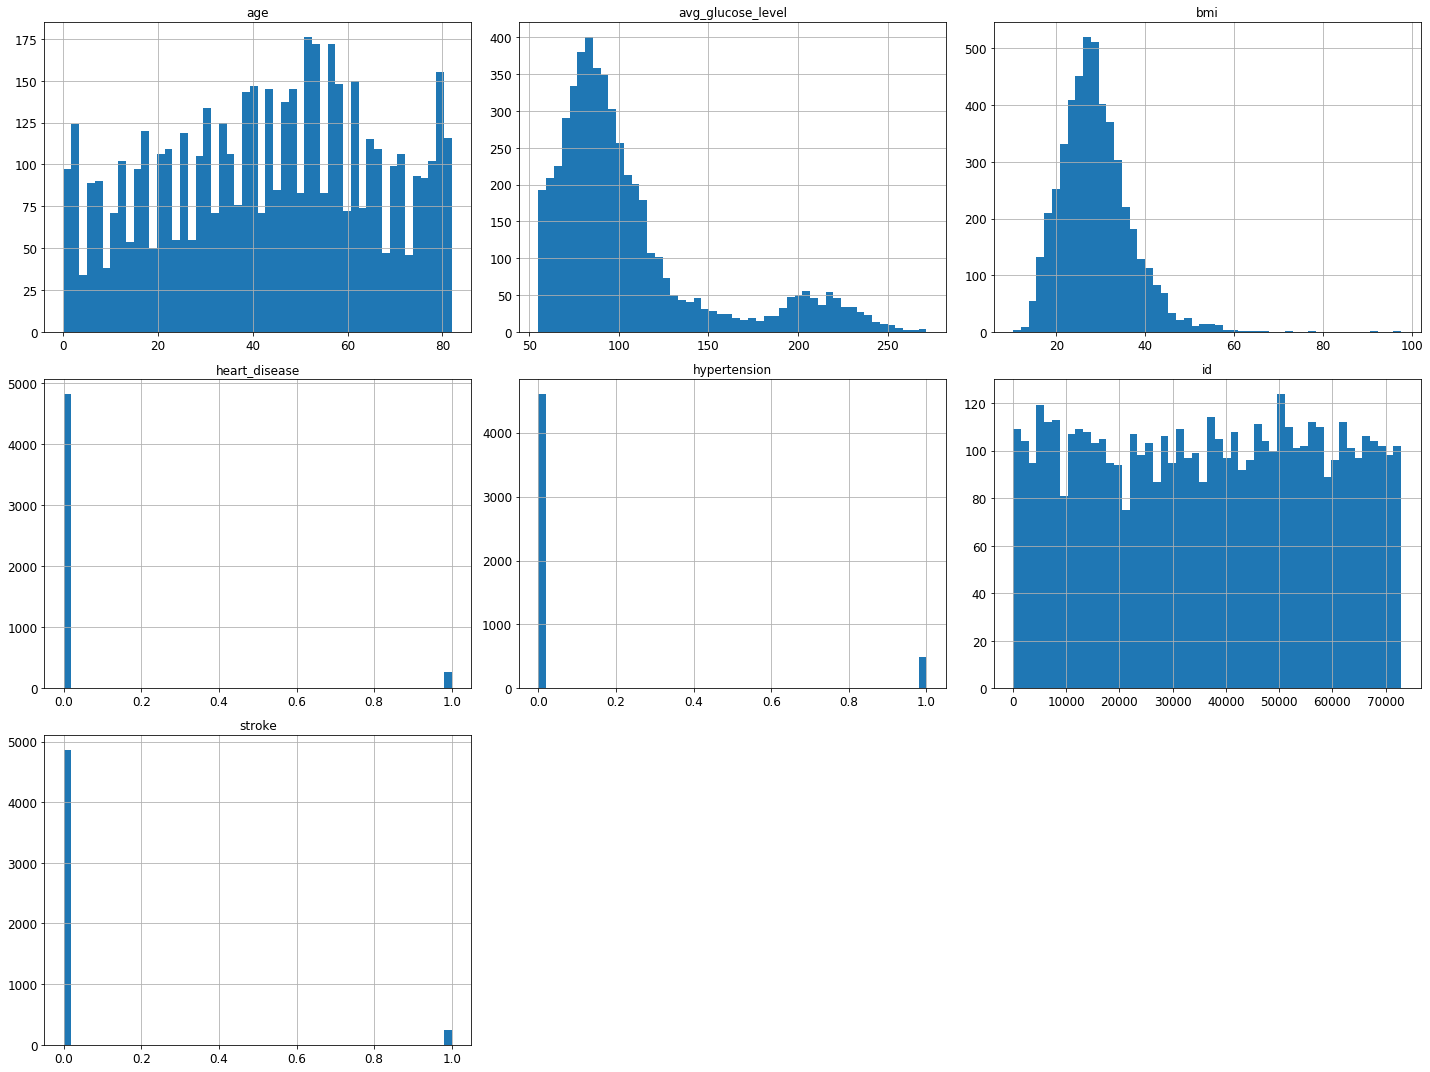

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
stroke.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [9]:
corr_matrix = stroke.corr()

In [10]:
corr_matrix["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

Saving figure scatter_matrix_plot


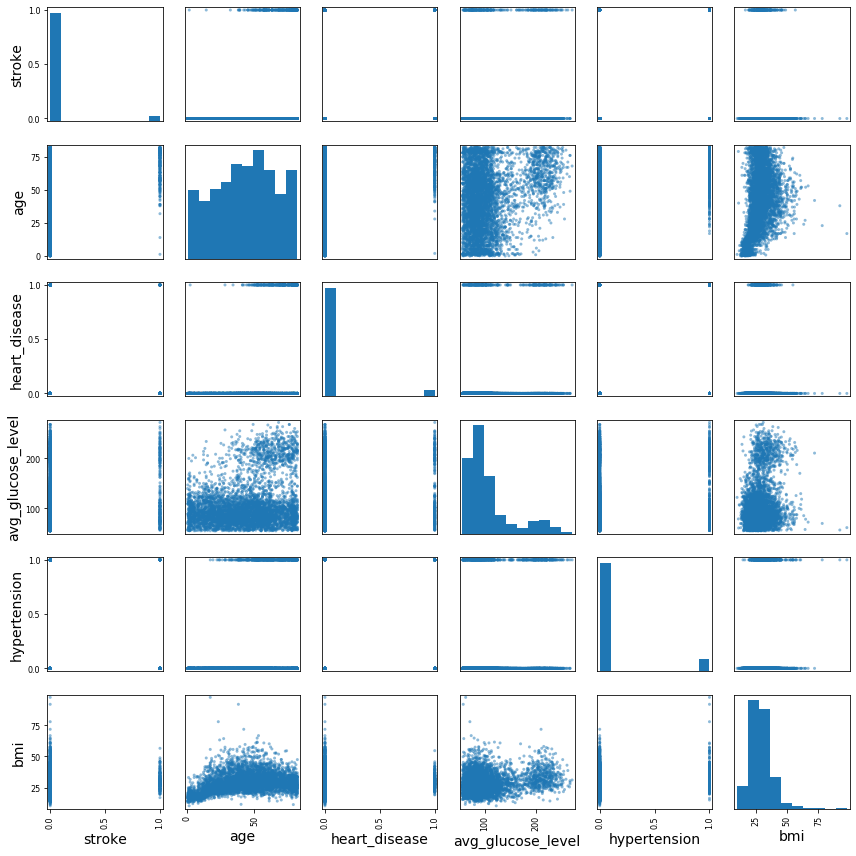

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["stroke", "age", "heart_disease",
              "avg_glucose_level","hypertension","bmi" ]
scatter_matrix(stroke[attributes], figsize=(12, 12))
save_fig("scatter_matrix_plot")

# Split into training and test 

In [12]:
np.random.seed(42)

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stroke,test_size=0.20,random_state=42)

In [14]:
len(train_set), len(test_set)

(4088, 1022)

This dataset has an unique ID as first row (id) so no need to generate unique identifiers.

Next, we explore how stratified the train and test dataset are.

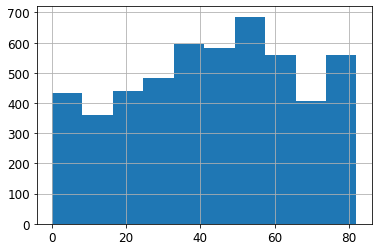

In [15]:
stroke["age"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(stroke, stroke["age"]):
    strat_train_set = stroke.loc[train_index]
    strat_test_set = stroke.loc[test_index]

In [17]:
strat_test_set["age"].value_counts() / len(strat_test_set)

78.00    0.019569
57.00    0.018591
52.00    0.017613
45.00    0.016634
79.00    0.016634
           ...   
1.72     0.000978
1.00     0.000978
0.88     0.000978
0.48     0.000978
0.16     0.000978
Name: age, Length: 102, dtype: float64

In [18]:
stroke["age"].value_counts() / len(stroke)

78.00    0.019961
57.00    0.018591
52.00    0.017613
54.00    0.017025
51.00    0.016830
           ...   
1.40     0.000587
0.48     0.000587
0.16     0.000587
0.08     0.000391
0.40     0.000391
Name: age, Length: 104, dtype: float64

To properly compare the randomized test set and the stratatified one we do the following:

In [19]:
def income_cat_proportions(data):
    return data["age"].value_counts() / len(data)

train_set, test_set = train_test_split(stroke, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(stroke),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [21]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0.08,0.000391,NaN,0.001957,400.000000,NaN
0.16,0.000587,0.000978,NaN,NaN,66.666667
0.24,0.000978,0.000978,0.001957,100.000000,0.000000
0.32,0.000978,0.000978,0.000978,0.000000,0.000000
0.40,0.000391,NaN,NaN,NaN,NaN
...,...,...,...,...,...
78.00,0.019961,0.019569,0.019569,-1.960784,-1.960784
79.00,0.016634,0.016634,0.011742,-29.411765,0.000000
80.00,0.013699,0.013699,0.013699,0.000000,0.000000
81.00,0.011742,0.011742,0.013699,16.666667,0.000000


There is some advantage to using the stratified datasets. We will continue with using the stratified datasets.

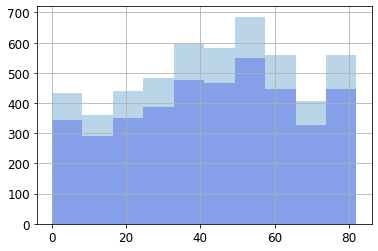

In [22]:
strat_train_set["age"].hist(alpha=0.3,color='blue')
#train_set["age"].hist(alpha=0.3,color='red')
stroke["age"].hist(alpha=0.3,color='tab:blue')

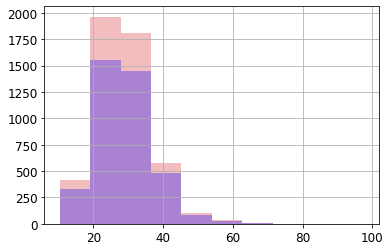

In [23]:
stroke["bmi"].hist(alpha=0.3,color='tab:red')
strat_train_set["bmi"].hist(alpha=0.3,color='blue')

In [24]:
strat_train_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1410,21381,Female,52.00,0,0,Yes,Private,Urban,107.29,28.1,never smoked,0
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
1189,2750,Male,73.00,1,1,Yes,Self-employed,Rural,230.68,37.7,Unknown,0
262,37893,Female,37.00,0,0,Yes,Private,Rural,73.50,26.1,formerly smoked,0
3052,26103,Male,36.00,0,0,Yes,Private,Rural,106.85,40.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3047,40602,Female,22.00,0,0,No,Private,Urban,62.52,38.2,never smoked,0
85,32399,Male,54.00,0,0,Yes,Private,Rural,96.97,29.1,smokes,1
4010,69847,Female,30.00,0,0,Yes,Self-employed,Urban,76.70,24.2,never smoked,0
478,71585,Female,66.00,0,0,Yes,Govt_job,Urban,87.24,22.5,formerly smoked,0


In [25]:
stroke = strat_train_set
stroke = strat_train_set.drop("stroke", axis=1) # drop labels for training set
stroke_labels = strat_train_set["stroke"].copy()

# prepare the data for ML algorithm 

In [26]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 1410 to 2772
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3930 non-null   float64
 10  smoking_status     4088 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 383.2+ KB


In [27]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 1410 to 2772
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4088 non-null   int64  
 1   gender             4088 non-null   object 
 2   age                4088 non-null   float64
 3   hypertension       4088 non-null   int64  
 4   heart_disease      4088 non-null   int64  
 5   ever_married       4088 non-null   object 
 6   work_type          4088 non-null   object 
 7   Residence_type     4088 non-null   object 
 8   avg_glucose_level  4088 non-null   float64
 9   bmi                3930 non-null   float64
 10  smoking_status     4088 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 383.2+ KB


In [28]:
stroke.dropna(subset=["bmi"])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1410,21381,Female,52.00,0,0,Yes,Private,Urban,107.29,28.1,never smoked
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown
1189,2750,Male,73.00,1,1,Yes,Self-employed,Rural,230.68,37.7,Unknown
262,37893,Female,37.00,0,0,Yes,Private,Rural,73.50,26.1,formerly smoked
3052,26103,Male,36.00,0,0,Yes,Private,Rural,106.85,40.1,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
3047,40602,Female,22.00,0,0,No,Private,Urban,62.52,38.2,never smoked
85,32399,Male,54.00,0,0,Yes,Private,Rural,96.97,29.1,smokes
4010,69847,Female,30.00,0,0,Yes,Self-employed,Urban,76.70,24.2,never smoked
478,71585,Female,66.00,0,0,Yes,Govt_job,Urban,87.24,22.5,formerly smoked


Convert all the text and categorical variables in numbers. 

In [332]:
stroke_gender = stroke[["gender"]]
stroke_ever_married = stroke[["ever_married"]]
stroke_work_type = stroke[["work_type"]]
stroke_Residence_type = stroke[["Residence_type"]]
stroke_smoking_status = stroke[["smoking_status"]]

In [333]:
from sklearn.preprocessing import OrdinalEncoder

gender_encoder = OrdinalEncoder(categories = [['Other', 'Male', 'Female']])
ever_married_encoder = OrdinalEncoder(categories = [['No','Yes']])
work_type_encoder = OrdinalEncoder(categories = [['Never_worked','children','Govt_job','Private','Self-employed']])
Residence_type_encoder = OrdinalEncoder(categories = [['Rural', 'Urban']])
smoking_status_encoder = OrdinalEncoder(categories = [['Unknown', 'never smoked','formerly smoked', 'smokes']])

stroke_gender_encoded = gender_encoder.fit_transform(stroke_gender)
stroke_ever_married_encoded = ever_married_encoder.fit_transform(stroke_ever_married)
stroke_work_type_encoded = work_type_encoder.fit_transform(stroke_work_type)
stroke_Residence_type_encoded = Residence_type_encoder.fit_transform(stroke_Residence_type)
stroke_smoking_status_encoded = smoking_status_encoder.fit_transform(stroke_smoking_status)

In [334]:
gender_encoder.categories_

[array(['Other', 'Male', 'Female'], dtype=object)]

In [335]:
ever_married_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [336]:
work_type_encoder.categories_

[array(['Never_worked', 'children', 'Govt_job', 'Private', 'Self-employed'],
       dtype=object)]

In [337]:
Residence_type_encoder.categories_

[array(['Rural', 'Urban'], dtype=object)]

In [338]:
smoking_status_encoder.categories_

[array(['Unknown', 'never smoked', 'formerly smoked', 'smokes'],
       dtype=object)]

In [339]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1410,21381,Female,52.00,0,0,Yes,Private,Urban,107.29,28.1,never smoked
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown
1189,2750,Male,73.00,1,1,Yes,Self-employed,Rural,230.68,37.7,Unknown
262,37893,Female,37.00,0,0,Yes,Private,Rural,73.50,26.1,formerly smoked
3052,26103,Male,36.00,0,0,Yes,Private,Rural,106.85,40.1,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
3047,40602,Female,22.00,0,0,No,Private,Urban,62.52,38.2,never smoked
85,32399,Male,54.00,0,0,Yes,Private,Rural,96.97,29.1,smokes
4010,69847,Female,30.00,0,0,Yes,Self-employed,Urban,76.70,24.2,never smoked
478,71585,Female,66.00,0,0,Yes,Govt_job,Urban,87.24,22.5,formerly smoked


Separate the numerical (not categorical) variables from stroke dataset.

In [340]:
stroke_num = stroke.drop(["id","gender","hypertension","heart_disease","ever_married",
             "work_type","Residence_type","smoking_status"],axis=1)

In [341]:
stroke_num

,age,avg_glucose_level,bmi
1410,52.00,107.29,28.1
363,0.64,83.82,24.9
1189,73.00,230.68,37.7
262,37.00,73.50,26.1
3052,36.00,106.85,40.1
...,...,...,...
3047,22.00,62.52,38.2
85,54.00,96.97,29.1
4010,30.00,76.70,24.2
478,66.00,87.24,22.5


In [342]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [343]:
stroke_num_tr = num_pipeline.fit_transform(stroke_num)

In [344]:
stroke_num

,age,avg_glucose_level,bmi
1410,52.00,107.29,28.1
363,0.64,83.82,24.9
1189,73.00,230.68,37.7
262,37.00,73.50,26.1
3052,36.00,106.85,40.1
...,...,...,...
3047,22.00,62.52,38.2
85,54.00,96.97,29.1
4010,30.00,76.70,24.2
478,66.00,87.24,22.5


In [345]:
from sklearn.compose import ColumnTransformer

num_attribs = list(stroke_num)
#cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1", gender_encoder, ["gender"]),
        ("cat2", ever_married_encoder, ["ever_married"]),
        ("cat3", work_type_encoder, ["work_type"]),
        ("cat4", Residence_type_encoder, ["Residence_type"]),
        ("cat5", smoking_status_encoder, ["smoking_status"]),
    ])

stroke_prepared = full_pipeline.fit_transform(stroke)

In [346]:
stroke_prepared.shape

(4088, 8)

# select and train a model

In [376]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(stroke_prepared, stroke_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [377]:
# let's try the full preprocessing pipeline on a few training instances
some_data = stroke#.iloc[:100]
some_labels = stroke_labels#.iloc[:100]
some_data_prepared = full_pipeline.transform(some_data)

#print("Predictions:", lin_reg.predict(some_data_prepared))

Compare against the actual values:

In [378]:
#print("Labels:", list(some_labels))

In [379]:
from sklearn.metrics import confusion_matrix
confusion_matrix(some_labels, lin_reg.predict(some_data_prepared))

array([[3891,    0],
       [ 197,    0]])

Logistic regressing did not do well. All the cases were classified as non-stroke. Not even one case was classified as stroke. Something is off. 

In [380]:
confusion_matrix(some_labels, some_labels)

array([[3891,    0],
       [   0,  197]])

In [350]:
from sklearn.metrics import mean_squared_error

stroke_predictions = log_reg.predict(stroke_prepared)
log_mse = mean_squared_error(stroke_labels, stroke_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

0.21952180728746604

In [351]:
from sklearn.metrics import mean_absolute_error

log_mae = mean_absolute_error(stroke_labels, stroke_predictions)
log_mae

0.04818982387475538

In [356]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(stroke_prepared, stroke_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [357]:
stroke_predictions = tree_reg.predict(stroke_prepared)
tree_mse = mean_squared_error(stroke_labels, stroke_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [381]:
confusion_matrix(stroke_predictions, some_labels)

array([[3891,    0],
       [   0,  197]])

It appears that the decision tree model is overfit. All 197 stroke cases were correctly classified on the training dataset. 

# fine tune the model

In [354]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, stroke_prepared, stroke_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [355]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.320452   0.30879528 0.26627926 0.27530823 0.27971344 0.31661412
 0.32799308 0.31272913 0.29288959 0.28439823]
Mean: 0.29851723676365105
Standard deviation: 0.020365699557895963
